# Projecto Zipline

### Importamos todas las librerás requeridas y sus respectivos magics para buen funcionamiento

In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from zipline.api import order, record, symbol
%matplotlib notebook

### Realizamos la importacion de los datos de 4 diferentes empresas para pruebas: Tesla, Google, Apple y Nvidia, y definimos el intervalo de tiempo

In [2]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2017,12,31)
tsla = web.DataReader('TSLA','google',start,end)
goog = web.DataReader('GOOG','google',start,end)
appl = web.DataReader('AAPL','google',start,end)
nvda = web.DataReader('NVDA','google',start,end)
#plt.get_backend()

/home/jorge/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


### Revisamos informacion de los datos recibidos

In [3]:
tsla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-02,35.00,35.45,34.70,35.36,1194710
2013-01-03,35.18,35.45,34.75,34.77,741941
2013-01-04,34.80,34.80,33.92,34.40,673993
2013-01-07,34.80,34.80,33.90,34.34,441909
2013-01-08,34.50,34.50,33.11,33.68,1283985


In [4]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 5 columns):
Open      1259 non-null float64
High      1259 non-null float64
Low       1259 non-null float64
Close     1259 non-null float64
Volume    1259 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [5]:
#tsla.to_csv('tsla.csv')
#appl.to_csv('appl.csv')
#goog.to_csv('goog.csv')
#nvda.to_csv('nvda.csv')

### Graficamos los valores de apertura de cada empresa por separado y al final en un conjunto

In [6]:
plt.figure(1)
tsla_plot = plt.subplot()
#tsla_close = plt.subplot()
tsla_plot.plot(tsla['Close'],color='green')
plt.legend(['Tesla Close Value'],loc="upper left")
plt.title('Valores de Cierre Tesla')

<IPython.core.display.Javascript object>

In [7]:
plt.figure(2)
goog_plot = plt.subplot()
goog_plot.plot(goog['Close'],color='blue')
plt.legend(['Google Close Value'],loc="upper left")
plt.title('Valores de Cierre Google')

<IPython.core.display.Javascript object>

In [8]:
plt.figure(3)
appl_plot = plt.subplot()
appl_plot.plot(appl['Close'],color='red')
plt.legend(['Apple Close Value'],loc="upper left")
plt.title('Valores de Cierre Apple')

<IPython.core.display.Javascript object>

In [9]:
plt.figure(4)
nvda_plot = plt.subplot()
nvda_plot.plot(nvda['Close'],color='purple')
plt.legend(['Nvidia Close Value'],loc="upper left")
plt.title('Valores de Cierre Nvidia')

<IPython.core.display.Javascript object>

In [10]:
plt.figure(5)
tsla_plot=plt.subplot()
goog_plot=plt.subplot()
appl_plot=plt.subplot()
nvda_plot=plt.subplot()
tsla_plot.plot(tsla['Close'],color='green')
goog_plot.plot(goog['Close'],color='blue')
appl_plot.plot(appl['Close'],color='red')
nvda_plot.plot(nvda['Close'],color='purple')
plt.legend(['Tesla','Google','Apple','Nvidia'],loc="upper left")
plt.title('Valores de Cierre')

<IPython.core.display.Javascript object>

### Revisamos si existen split's o merge's

Para encontrar de los splits y merge vamos a proceder de forma matematica para encontrar los posibles splits y merge.

Primero creamos una nueva columna en la que iran la diferencia entre el valor Open y el valor Close.

Sacamos el promedio de diferencia y la desviacion estandar, estadisticamente sabemos que todo lo que se aleje mas de 3 desviaciones estandar del promedio es un "outlier" es decir un dato fuera de lo normal, estos son los más probavles splits y merge.

graficamos un histograma para ver la forma de los datos y creamos una lista que contenga estos outliers y otra que contenga la fecha de estos para poder revisar manualmente si fueron splits o merge o simplemente es un caso extraordinario.

In [11]:
def dif_open_close(symbol):
    diferencia= []
    for x in range(len(symbol['Open'])):
        diferencia.append(symbol['Open'][x]-symbol['Close'][x])
    return diferencia

In [12]:
def found_outliers(symbol):
    symbol['Cambio'] = dif_open_close(symbol)
    mean = symbol['Cambio'].mean()
    std = symbol['Cambio'].std()
    plt.figure('Histograma_Cambios')
    plt.hist(symbol['Cambio'],500)
    
    print('La media es: {}'.format(mean))
    print('La desviacion estandar es: {}'.format(std))
    
    idx = []
    vals = []
    for x in symbol['Cambio']:
        if x>=(mean+(std*3)) or x<=(mean-(std*3)):
            vals.append(x)
            idx.append(symbol.index[symbol['Cambio']==x])
            
            
    
    for x in vals:
        print(x)
        #print(symbol.index['Cambio'][x])
    for x in idx:
        print(x)

    
    
found_outliers(appl)



<IPython.core.display.Javascript object>

La media es: -0.009444003177124478
La desviacion estandar es: 1.234299557681999
4.16
3.74
-3.93
3.9
3.78
4.32
4.67
-8.25
7.37
3.77
-3.74
-3.98
6.21
4.58
-3.76
DatetimeIndex(['2014-09-03'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2014-12-01'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2014-12-09'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-04-28'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-07-09'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-08-11'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-08-21'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-08-24'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-08-25'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-09-29'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-12-04'], dtype='datetime64[ns]', name='D

### Creamos los promedios moviles para empezar sera a 20 días

Para sacar el promedio movil creamos una funcion que toma dos parametros, el primero es la accion a revisar y el segundo es el numero de días del promedio movil.
Esta nos regresa una lista con todos los valores del promedio movil.
Continuamos graficando esto contra los valores de cierre de cada día y asi podemos ver cuando deberiamos comprar y cuando vender.

In [13]:
def prom_mov(symbol, dias = 20):
    list=[]
    suma_i = 0
    t=0
    suma_f = 0
    for x in range(dias-1):
        list.append(0)
    for i in range(len(symbol['Close'])-dias+1):
        suma_i = 0
        for j in range(dias):
            suma_i += symbol['Close'][i+j]
        t +=1
        prom1 = suma_i/dias
        suma_f += prom1
        list.append(prom1)
    promf = suma_f/t
    symbol['PromedioMov']= list
    print(symbol.head(21))
    
    
prom_mov(tsla,20)

             Open   High    Low  Close   Volume  PromedioMov
Date                                                        
2013-01-02  35.00  35.45  34.70  35.36  1194710       0.0000
2013-01-03  35.18  35.45  34.75  34.77   741941       0.0000
2013-01-04  34.80  34.80  33.92  34.40   673993       0.0000
2013-01-07  34.80  34.80  33.90  34.34   441909       0.0000
2013-01-08  34.50  34.50  33.11  33.68  1283985       0.0000
2013-01-09  34.01  34.19  33.40  33.64   697979       0.0000
2013-01-10  33.87  33.99  33.38  33.53   922405       0.0000
2013-01-11  34.04  34.04  32.11  32.91  1563274       0.0000
2013-01-14  33.08  33.38  32.85  33.26   925018       0.0000
2013-01-15  33.11  34.25  33.08  33.90  1624389       0.0000
2013-01-16  33.85  34.23  33.73  34.10  1378138       0.0000
2013-01-17  34.16  34.85  33.92  34.38  1436604       0.0000
2013-01-18  34.74  34.78  33.82  34.52  3555074       0.0000
2013-01-22  34.56  35.55  34.26  35.19  1920131       0.0000
2013-01-23  35.02  36.24

<IPython.core.display.Javascript object>


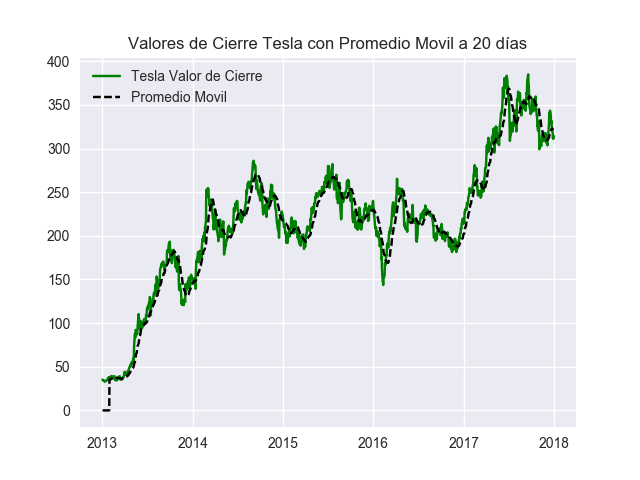

In [22]:
plt.figure(7)
tsla_pm = plt.subplot()
tsla_close = plt.subplot()
tsla_close.plot(tsla['Close'],color='green')
tsla_pm.plot(tsla['PromedioMov'],color='black',linestyle='--')
plt.legend(['Tesla Valor de Cierre','Promedio Movil'],loc="upper left")
plt.title('Valores de Cierre Tesla con Promedio Movil a 20 días')

### Utilidad del promedio movil en esta accion

In [66]:
def utl_prom_mov(symbol,compra,startdate,enddate):
    accion1 = ""
    accion2 = ""
    acciones = 0
    costo = 0
    ganancia = 0
    contador_compra = 0
    contador_venta = 0
    for x in range(len(symbol['PromedioMov'])):
        if x == len(symbol['PromedioMov'])-1:
            pass
        elif symbol['PromedioMov'][x] <= symbol['Close'][x] and symbol['PromedioMov'][x] > symbol['Close'][x+1]:
            accion2 = 'Venta'
            contador_venta +=1
           
        elif symbol['PromedioMov'][x] >= symbol['Close'][x] and symbol['PromedioMov'][x] < symbol['Close'][x+1]:
            accion2 = 'Compra'
            contador_compra += 1 
        else:
            pass
        if accion1 == accion2:
            pass
        else:
            accion1 = accion2
            print(accion1)
            if accion1 == 'Compra':
                acciones += compra
                costo = acciones * symbol['Close'][x]
                print('Costo = {}'.format(costo))
            else:
                gananciaper = acciones * symbol['Close'][x]-costo
                ganancia += (acciones * symbol['Close'][x])-costo
                if acciones - compra <0:
                    acciones -= acciones
                else:
                    acciones -= compra
                print('Ganancia de periodo = {}'.format(gananciaper))
                print('Ganancia acumulada = {}'.format(ganancia))
            print(acciones)

utl_prom_mov(tsla,1,2,1)
        

Venta
Ganancia de periodo = 0.0
Ganancia acumulada = 0.0
0
Compra
Costo = 37.04
1
Venta
Ganancia de periodo = 1.5
Ganancia acumulada = 1.5
0
Compra
Costo = 36.65
1
Venta
Ganancia de periodo = 2.3299999999999983
Ganancia acumulada = 3.8299999999999983
0
Compra
Costo = 36.01
1
Venta
Ganancia de periodo = 64.03999999999999
Ganancia acumulada = 67.86999999999999
0
Compra
Costo = 94.47
1
Venta
Ganancia de periodo = 6.180000000000007
Ganancia acumulada = 74.05
0
Compra
Costo = 99.55
1
Venta
Ganancia de periodo = 27.710000000000008
Ganancia acumulada = 101.76
0
Compra
Costo = 109.05
1
Venta
Ganancia de periodo = 71.89999999999999
Ganancia acumulada = 173.66
0
Compra
Costo = 173.31
1
Venta
Ganancia de periodo = 9.759999999999991
Ganancia acumulada = 183.42
0
Compra
Costo = 178.7
1
Venta
Ganancia de periodo = 4.700000000000017
Ganancia acumulada = 188.12
0
Compra
Costo = 162.17
1
Venta
Ganancia de periodo = 14.640000000000015
Ganancia acumulada = 202.76000000000002
0
Compra
Costo = 124.17
1
Ven

### Sacaremos el porcentaje de cambio diario

In [ ]:
def pct_cambio(symbol):
    symbol['Pct Cambio'] =symbol['Close'].pct_change()
    symbol['Pct Cambio'].fillna(0, inplace=True)
    print(symbol.head())
    
pct_cambio(appl)

In [ ]:
%load_ext zipline

In [ ]:
#%%zipline --start 2013-1-1 --end 2017-12-31
#%%zipline --start 2000-1-1 --end 2014-1-1


In [ ]:
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)